# Exercise
* Try out different time-step sizes. What do you observe? Why do you observe the pattern you observe?
* Gather in groups of 3 to 4 students. Try to derive an optimal time-step size. What do you need to consider?
* Try to implement the optimal time-step size, which was defined in class.
* Discuss in your group: Which kind of analytical solution would you choose to benchamrk the numerical setup?
* Implement the analytical solution of your choice and compare it against the numerical solution.
* Implement linear decay and test it against an analytical solution.
* Try to model the first exercise with your adapted finite difference code.

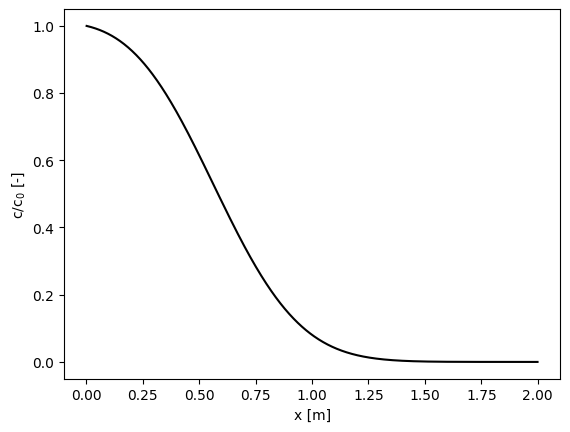

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

column_length = 2.0 # [m]
n_cells = 1000

v = 2*10**(-5) # linear average velocity [m/s]

R = 2.0 # retardation factor [-]
n = 0.3 # [-]
alpha = 0.1 # [m]
Dp = 1*10**(-9) # [m^2/s]

D_eff = alpha*v + Dp # Scheidegger's dispersion [m^2/s]

dt = 1.0; # time-step size [s]

time_with_inflow = 1.0/v # [s]

## Finite-Difference Discretization of the ADE ## 


Tracers = "Uranin"
R_tracers = deepcopy(R)
alpha_l_tracers = deepcopy(alpha)

simulated_time_tot =deepcopy(time_with_inflow)

delta_x = column_length/((n_cells)-1)
x = np.linspace(0.0,2.0-delta_x,n_cells) + delta_x/2.0
v_vec = np.ones(n_cells)*v
q_vec = v_vec*n

R_tracer = np.ones(n_cells)*R;

D_eff_vec = alpha_l_tracers*v_vec + Dp*np.ones(n_cells); 

C_inflow_tracer = 1.0 # inflowing concentration [mol/m^3]

C_ini_tracers = np.zeros(n_cells);

C_w = deepcopy(C_ini_tracers)

t = 0.0
iter_i = 1

while t<simulated_time_tot:

    if t + dt > simulated_time_tot:
        dt = simulated_time_tot-t

    new_conc_vec = np.concatenate((C_inflow_tracer,C_w[:-1]),axis=None)
    old_conc_vec = np.concatenate((C_w[1:],C_w[-1:]),axis=None)

    FD_advection_mulipliers = (q_vec*dt)/(delta_x*n*R_tracer) # fraction of new water due to advection
    C_w_add_advection = FD_advection_mulipliers*new_conc_vec -FD_advection_mulipliers*C_w;

    FD_Dispersion_multipliers =  (D_eff_vec*dt)/((delta_x**2)*R_tracer) # fraction of new water due to dispersion
    C_w_add_dispersion = FD_Dispersion_multipliers*(new_conc_vec - 2*C_w + old_conc_vec);

    C_w = C_w + C_w_add_advection + C_w_add_dispersion

    t = t + dt
    iter_i = iter_i + 1


plt.figure(1)
plt.plot(x,C_w,'k');plt.xlabel('x [m]'); plt.ylabel('c/c$_0$ [-]')
plt.show()
